#    Multi Layer Perceptrons
## Artificial Intelligence 1, week 8

This week:
- recap on perceptrons
- perceptrons are linear classifiers
- multi-layer perceptrons
   - architecture
   - feed forward predictions
   - back propagation for training
   - examples
   

# Neurons - The basis of  Neural Networks

<div>
<div style="float:left">
<p>Perceptrons, invented by Frank Rosenblatt in the late 1950's,<br>
    are a form of supervised machine learning algorithm inspired by neuron cells.<br><br>
    In neurones:</p>
    <ul>
    <li>signals come in along the dendrites and out along the axon.</li> 
    <li>Synapses connects a cell's dendrites to other cells' dendrites.</li>
<li>Crudely, input signals are 'summed' <br>
    and if they reach a certain threshold the neuron 'fires'<br>
and sends a signal down the synapse to the
    connected cells.</li>
    </ul>
</div>
<div style="float:right"><img src="figures/neuron.jpg" width=400></div>
</div>




# Perceptrons - The basis of Artificial Neural Networks
<div>
    <div style="float:left" width=400>
<p>Perceptrons are an algorithmic approximation of this process<br> and can learn to solve simple classification problems.</p>
<ul>
    <li>Input values are multiplied by a learnable parameter called a <b>weight</b>.</li>  
    <li>If the sum of the inputs $\times$ weights is over a certain threshold (0), <br>
    the Perceptron 'fires' and generates an output.</li>
    <li> To let us adapt the threshold in the same way as the weights we provide a <b>bias</b> signal.</li>
    <li>During training we iterate through a process of:
        <ol> 
            <li>Present a training item and calculate the perceptrons output</li>
            <li> Calculate the  error for that item </li>
           <li>Use the <b>error</b> to change the weights by a small amount (the learning rate).</li>
       </ol>
    </li>
    <li>The process is repeated until the error is 0, or as small as we can get it.</li>
</ul>
    </div>
<div style="float:right"><img src="figures/Perceptron.png", width=400/></div>
</div>

# Perceptrons Create Linear Decision Boundaries

<img src="figures/straightLine.png" style="float:right" width=300>


### Perceptron's output changes when the sum of the weighted  inputs is 0  
So if we plot the output at different points in space there is a  *decision boundary*.

This happens when  $input1 \times weight1 + input2 \times weight2 + biasweight = 0$

We can rearrange this equation to see that the change of behaviour happens when   
$input2 = - \frac{weight1}{ weight2} \times input1  - \frac{ biasweight}{ weight2}$

But this is just the equation for a straight line !
- slope (m) is given by -( weight1/ weight2)
- the intercept, c  = -( biasweight / weight2)

- step function => which side of the line is 1 or 0

So, the Perceptron is essentially learning a function for a straight line which is called the decision boundary.
In this case, which 'class' the set of inputs belongs to i.e. True or False.

interactive(children=(FloatSlider(value=-0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

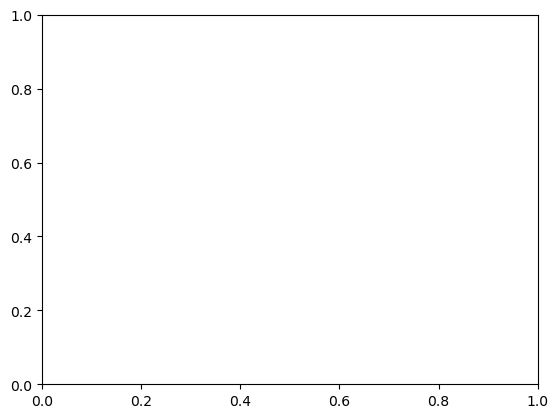

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from random import random

import W8_utils as utils
%matplotlib inline

weight1 = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
weight2 = widgets.FloatSlider(value=0.5,min = -1,max = 1)
biasweight = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
funcToModel = widgets.RadioButtons(options=['OR','AND','XOR'])
output=interact(utils.showPerceptron, w1=weight1,w2=weight2,bias=biasweight,func = funcToModel)

## Perceptron Training Law
Every time you present an example you compare the output to the desired value,  
then update each weight in turn using:

    ∆ω_i = ε · input_i · α

    change in weight_i  = error   X input_i  X learning rate (fixed)

So this means that 
- Error = target-actual, can be negative 
- Weights only change when there is an error 
- Only active inputs are changed. 
- Inactive (x=0) inputs are not changed at all (which makes sense since they did not contribute to the error). 

See AI illuminated p297+ for a worked example

### Example of how you might code a perceptron classifier with sklearn-like methods
1 Update the simple perceptron we created in week 7
- to have methods for *fit()* *predict()* and *predict_proba()* (output probabilites per class)
- to be configurable to any number of inputs

2 Then we will use it to *train* a model &hArr; *fit* it to the data &hArr; *search* for a model that minimises the loss on the training set
- to predict  "setosa- not setosa" for the iris data, 
- using the first two features for clarity

<div class="alert alert-block alert-warning" style="color:black">
    <h3> Aside: thanks to graphics we have highly optimised routines </h3>
    <p> We've discussed how perceptron sums weighted inputs then compares the total to a threshold to decide whether to output 1 or 0.</p>
    <p>For example, with  three inputs and a bias it outputs 1 if <br>
        <em> w1*in1 + w2*in2 *w3*in3 +biasweight*1 >0</em> </p>
    <p> Tthis formula is an example of a <b>vector inner (dot) product</b><ul>
    <li>Let <b>a</b> and <b>b</b> be  two vectors <em>[a1,a2,a3] [b1,b2,b3]</em> </li>
    <li> Their 'dot product': <b>a . b</b> = <em>  a1*b1+ a2*b2* a3*b3 </em></li>
    </ul>
    <p> This operation turns out to be useful for all sorts of maths - especially graphics,<br> so most systems come with highly optimised routines.e.g. <code>np.dot(a,b)</code></p>    
</div>

In [7]:
class Perceptron:
    """ Example code for a simple perceptron   """

    def predict(self, input_records:np.ndarray) -> int:
        """makes predictions for a set of input examples"""

        #defensive programming: ensure records have the expected number of features
        assert self.n_inputs == input_records.shape[1], 'wrong number of features'

        ypred= np.zeros(input_records.shape[0])
        for row in range(input_records.shape[0]):
            ypred[row]= self.predict_one(input_records[row])

        return ypred

    def predict_one(self, record:np.array)->int:
        """ makes a prediction for a single record

        """

        summed_input =  1*self.bias_weight + np.dot(self.weights, record)
        return 1 if summed_input > 0 else 0

    def fit(self,train_X,train_y, max_epochs=10, learning_rate=0.1):
        """ fits the percepton to the data"""
        #create right number of random input weights
        self.learning_rate=learning_rate
        self.n_inputs= train_X.shape[1]
        self.weights= np.random.rand(self.n_inputs)
        self.bias_weight=np.random.rand()

        errors,epoch =99999,0
        while epoch < max_epochs  and errors:
            self.update_weights(train_X,train_y)
            errors= (train_y != self.predict(train_X)).sum()
            epoch += 1
        print(f" After epoch {epoch} there were {errors} errors")
        self.is_fitted_=True


    def update_weights( self, input_data:np.ndarray, targets:np.array):
        """ does weight updates for each example in turn
        """
        for row in range(input_data.shape[0]):
            #row_as_nparray= input_data[row].reshape(1,input_data.shape[1])
            prediction= self.predict_one(input_data[row])#(row_as_nparray)
            error= targets[row]- prediction#[0]
            if error != 0:
                self.bias_weight += error * 1   * self.learning_rate
                for feature in range (self.n_inputs):
                    self.weights[feature]    += error * input_data[row,feature] * self.learning_rate


### Perceptrons - Behaviour on Real Data 
### We'll train two classifiers from the iris data: one each to recognise setosa and virginica varieties

Truth table data and logical functions are a good way to learn the Perceptron algorithm but the data isn't very realistic.

Most problems are much more complex and cannot be represented with binary data or solved with only 4 training examples.  
We were also only training for one **step** (one input example) or one **epoch** (all input examples) at a time, so that we
could see what the algorithm was doing.

In supervised learning, especially with neural networks, we generally:
1.  **Preprocess** the data so each feature is scaled to the range 0,... 1, 
   - so that each feature is of equal importance
2. Identify **Stopping Criteria** for training such as:
   - when there is no improvement in the number of errors on the training data
   - or after some fixed number of epochs

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay

iris_x,iris_y = load_iris(return_X_y=True)
preprocessor= MinMaxScaler()
scaled_petal_data=preprocessor.fit_transform(X=iris_x[:,:2])
#make binary labels
is_setosa=np.where(iris_y==0,1,0)
is_virginica = np.where(iris_y==2,1,0)
is_versicolor= np.where(iris_y==1,1,0)

In [14]:
#make perceptrons for each class:not class problems
setosa_classifier= Perceptron()
print('Fitting Setosa Classifier')
setosa_classifier.fit(scaled_petal_data,is_setosa,max_epochs=50,learning_rate=0.01)
preds= setosa_classifier.predict(scaled_petal_data)
print(f'accuracy= {(preds==is_setosa).sum()*100/150}%')

virginica_classifier= Perceptron()
print('\nFitting Virginica Classifier')
virginica_classifier.fit(scaled_petal_data,is_virginica,max_epochs=50,learning_rate=0.01)
preds=virginica_classifier.predict(scaled_petal_data)
print(f'accuracy= {(preds==is_virginica).sum()*100/150}%')

Fitting Setosa Classifier
 After epoch 13 there were 0 errors
accuracy= 100.0%

Fitting Virginica Classifier
 After epoch 50 there were 51 errors
accuracy= 66.0%


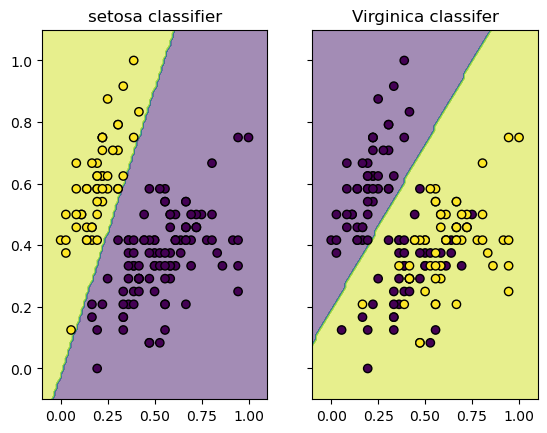

In [15]:
#display the results
fig,axs= plt.subplots(1,2,sharex=True,sharey=True)
axs[0].set_title("setosa classifier")
axs[1].set_title("Virginica classifer")
#utils.plot_decision_surface_v1(axs[0],setosa_classifier,scaled_petal_data,is_setosa)
#utils.plot_decision_surface_v1(axs[1],virginica_classifier,scaled_petal_data,is_virginica)

set_disp = DecisionBoundaryDisplay.from_estimator(
    setosa_classifier, scaled_petal_data,
    response_method="predict",
    alpha=0.5,eps=0.1,ax=axs[0]
    )
_ = set_disp.ax_.scatter(scaled_petal_data[:,0], scaled_petal_data[:,1], c=is_setosa, edgecolor="k")
virg_disp= DecisionBoundaryDisplay.from_estimator(
    virginica_classifier, scaled_petal_data,
    response_method="predict",
    alpha=0.5,eps=0.1,ax=axs[1]
    )
_ = virg_disp.ax_.scatter(scaled_petal_data[:,0], scaled_petal_data[:,1], c=is_virginica, edgecolor="k")
    #overlay the dataset records -black/red edges for train/test data



# Going beyond single straight decision boundaries
<div style="float: right; width: 50%">
<img align="right", src="figures/mlp.png", width = 75%/,height=40%/>
    </div>Some problems need more than one single decision boundary, or  curved (non-linear) boundaries.

So we need a more flexible architecture made out of the same building blocks.

Multi-Layer Perceptrons (MLPs) have:
* lots of connected perceptrons with trainable weights arranged in layers.
* calculations flow layer-by-layer from inputs to outputs like a breath search

At the output layers we know the targets and the computed activations 
* so we can use the perceptron training rule to adjust the last set of weights
* But we need some adjustment to know how to adjust the weights from inputs to hidden layer nodes

## Change 1: use an  activation function that tells us what the actual input signal was
<div style="float: right; width: 50%"><img src="figures/sigmoid.png", width = 80%/></div>
Instead of using a step function which loses all the detail, we use something with one-to-one mapping

Several options, most common is the *logistic* function $\sigma(x)$

$ output = \sigma(input)$

and using $x$ to stand for the input we have

$ \sigma(x)= \frac{1}{ 1+e^{-x}}\qquad\qquad= \frac{e^{x}}{ 1+e^{x}}$

 
 Which has the nice property that its *derivative* (gradient) is $\sigma(x) (1- \sigma(x))$

Nowadays people also use **relu** activation: $relu(x) = MAX(0,x)$

## MLP Predicting output for a sample with logistic activation 
<img style="float:right" width=50% src="figures/mlp-prediction.png">

**Input to node h1** = $w_1x_1 + w_3x_2$

**Output from node h1** = $\sigma(w_1x_1 +w_3x_2)$

**Input to node h2** = $w_2x_1 + w_4x_2$

**Output from node h2** = $ \sigma(w_2x_1 + w_4x_2)$

**Input to output node O** = $ w5\ \sigma(w_1x_1 + w_2x_2)  + w6\ \sigma(w_2x_1 + w_4x_2)$

**Output O** =   $ \sigma( \ w5\ \sigma(w_1x_1 + w_2x_2)  + w6\ \sigma(w_2x_1 + w_4x_2) ) $

## Change 2: _Back-propagation_ of errors according to their causes 
Since we don’t know what the ‘expected’ output of the hidden layer is, we cannot calculate the error.

Instead, we share out the error from an output neuron to each hidden neurons.

We do this in proportion to the strength of the signal coming from that hidden neuron. 

In practice we can feed in lots of samples then take the average of their errors


### MLP: error back propagation for weight updates with a single sample     <img style="float:right" width=40% src="figures/mlp-errors.png">

**One way of thinking about it**

Each *epoch* 
- Loop over every sample
  1. Update weights to final layer using 'real' difference between target and output
     - change in w5 = error * output from H1 * learning rate   
       = $E1 * \sigma(w_1x_1 +w_2x_2) * \alpha$  
  
     - change in w6 = error * output from H2  * learning rate.  
        = $ E1 *  \sigma(w_2x_1 + w_4x_2) * \alpha$
  

   2. Calculate share of error to feed back to hidden nodes
      -  E2 = (signal to Output from h1)/ (total signal input to Output)  
         = $\frac {\sigma(w_1x_1 +w_2x_2) }{ \sigma(w_1x_1 +w_2x_2) +\sigma(w_2x_1 + w_4x_2 )}$  
      - similar for E3

   3. Use these to update w1, w3 like perceptron training

   4. Same process for rest of network

### this is how it works conceptually - what about in practice?
1. Doing updates after each item means the results would depend ( a lot) on which order you presented the items
2. and it would be slow

Get around first point by:
- measuring and storing updates for each training item 
- then applying the average update

Get around the second point by doing this for *batches* of data rather than all at once.  
- Each epoch we randomly split the training data into batches (typical size 32)
- Then go through batch by batch, calculating all the updates **in parallel**, averaging then applying
- This is called **Stochastic Gradient Descent**
 - updates happen $\frac{training set size}{batch size}$ faster than updating only the end of an epoch when we've seen all the data
- runs *batch_size* faster than doing one-by-one because of parallelism

   
   **if you can do it all in memory** (which is where GPUs and super-efficient libraries for vector/matrix algebra come in ...)

# Change 3: We can have more than one output node
- For a binary problem:
    - we have *one* output node with logistic activation,
     - and  interpret its output as the **probabilty** that the item belongs to class 1
    - usually threshold at 0.5 to make a prediction, but probabilities can be informative

- For a  problem with M classes:
    - we usually have M output nodes
    - 'onehot' encoding for y  
       e.g. (M=4)  0 1 0 0  instead of '1'
    - 'softmax' ('scaled all or nothing') activation function for final layer  
      node outputs get scaled so they sum to 1,  
      e.g. $(0.2 0.5 0.4 0.6) \rightarrow (0.18, 0.29, 0.24, 0.35)$ 
      - use these values vs. the onehot encoding to get errors during training 
      - for making prediction choose index of output with  highest value : 3

- For regression problem:
    - usually one output node with a linear activation  
      e.g. output = summed weighted inputs
    

## Implementation: layers not nodes!
In production code  we can represent the signals (inputs, each layer of hidden nodes, output nodes) as  vectors and the weights between each layer as a matrix. This means we can do the whole thing as a sequence of vector-matrix multiplications: **which is exactly what GPUs are designed to do extremely efficiently!!** 

So in the example above: 
$\mathbf{x}=\begin{pmatrix}x_1\\x_2\\\end{pmatrix} \qquad \mathbf{h} = \begin{pmatrix}h1\\h2\\\end{pmatrix} \qquad \mathbf{o}=\begin{pmatrix}o\end{pmatrix}$

the weights between layers are:
$W_1 = \begin{pmatrix}w_1, w_2\\w_3,w_4\\\end{pmatrix} \qquad W_2 = \begin{pmatrix}w_5\\w_6\\\end{pmatrix} $ 

Then by the definition of matrix-vector multiplication and how we apply a function to a vector, 
- the input to the layer of hidden nodes is $ \mathbf{h} = W_1 \cdot \mathbf{x}$
- so the output from the hidden layer is $logistic(\mathbf{h})$
- and we can write out the whole behaviour leading to the output $\mathbf{o}$ as:

$ \qquad\qquad \mathbf{o} = logistic\left( W_2\cdot logistic(W_1 \cdot \mathbf{x}) \right)$

# Do I have to write this myself?

As we mentioned above, it is 'cleanest' way to implement this using vector and matrix algebra,  
and tools like Google's *tensorflow* will let you do exactly that

Nowadays libraries like *PyTorch* and *keras* (part of tensorflow)  hide many of the details to provide a quick clean coding interface
with *lots* of options
- you'll see these in years 2 and 3.

For now we will use the sklearn implementation:  
`class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', ...)`

and show it working first for XOR then for the iris data

In [16]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.neural_network import MLPClassifier
xor_X = np.asarray( [[0,0],[0,1],[1,0],[1,1]])
xor_y = [0,1,1,0]#XOR


# one hidden layer with 3 neurons logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)
xorMLP = MLPClassifier( hidden_layer_sizes = (3),
                        activation='logistic', solver='sgd',
                        batch_size=1,learning_rate_init=0.1,
                        n_iter_no_change=1000,random_state=1)
xorMLP.fit(xor_X,xor_y)

accuracy = 100*  xorMLP.score(xor_X,xor_y)
print(f'Estimated accuracy is {accuracy} %')

#utils.plotDecisionSurface(xorMLP,xor_X,xor_y)


Estimated accuracy is 100.0 %


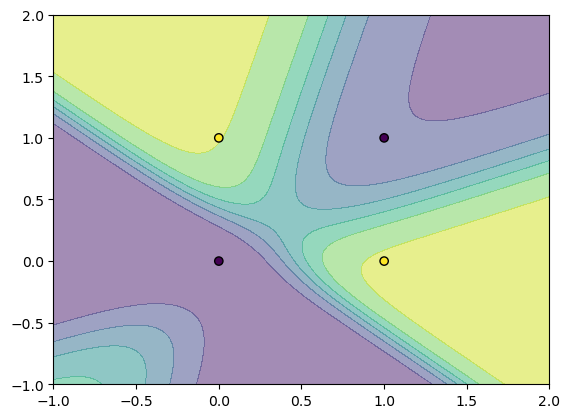

In [17]:
#make the visualisation of the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    xorMLP, xor_X,
    alpha=0.5,
)
#overlay the dataset records
_ = disp.ax_.scatter(xor_X[:,0], xor_X[:,1], c=xor_y, edgecolor="k")


### Now for Iris data

Estimated accuracy using the training set is 84.0 %


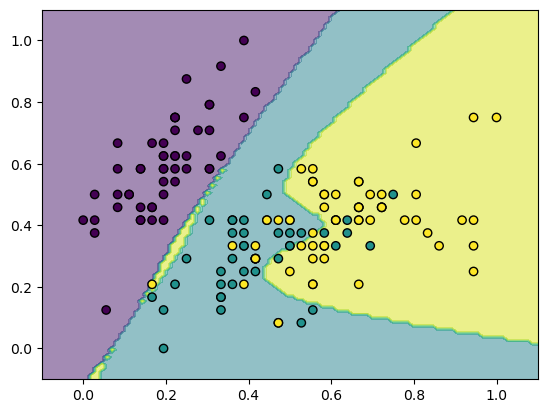

In [18]:

onehot_labels = np.vstack((is_setosa, is_versicolor,is_virginica)).transpose()

# one hidden layer with 5 neurons logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)
iris_MLP = MLPClassifier( hidden_layer_sizes = (10,),activation='logistic',solver='lbfgs',random_state=1)
iris_MLP.fit(scaled_petal_data,iris_y)#onehot_labels

accuracy = 100*  iris_MLP.score(scaled_petal_data,iris_y)#onehot_labels)
print('Estimated accuracy using the training set is {} %'.format(accuracy))


_ = DecisionBoundaryDisplay.from_estimator(
    iris_MLP, scaled_petal_data,
    alpha=0.5,eps=0.1
).ax_.scatter(scaled_petal_data[:,0], scaled_petal_data[:,1], c=iris_y, edgecolor="k")



# And it's trivial to add more hidden nodes or add layers if we want to ...

## Multi-Layer Perceptrons  today

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Deep_Learning.jpg" style="float:right" width = 400>

Since the 1980s Artificial Neural Networks have been hugely successful,   
across a range of classification, regression and control problems.

Only problems with MLPs were:
- reliance on creating appropriate features 
- reliance on  appropriate scaling
- lack of interpretablility

Deep Neural Networks:   MLP with >5 hidden layers

Typically complex early layers to find/create features such as:
- Convolutional Layers discover spatial patterns e.g. 1D,   2D (images) N-D (video)  
  each node acts like a small loical pattern detecting filter that 'sweeps over' the image 
- Recurrent Layers discover patterns in time e.g. speech recognition, natural language processing  
  each node has a memory and (often) a 'forget-gate' that responds to patterns  
  e.g. speech marks `"`in text or `/*` and `*/` for comments in code 

Because they have more weights to learn appropriate values for, Deep Networks need:
- *lots* of data, 
- *lots* of computational power / time to train

Deep Neural Networks useually have one or more  "dense" layers (like in a MLP) before the output

## A simple deep convolutional network for the MNIST data
<img src="https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png" width = 1200>
image from https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9


# Summary
The perceptron training algorithm is guaranteed to converge on a solution – if one exists.  
 - But this will only be the case for linearly separable problems.
 - and if more than one decision voundary separates the data, there are no guarantees which you will get

Multi-Layer Perceptrons solve this problem by combining perceptrons in a layered structure
- The network is capable of learning making non-linear decision boundaries
- Activation functions changed from a step, to something that preserves more information sigmoid (logistic)  
  so you can make big[small] changes to weights leading to a hidden node if it's summed inputs were   lots [a little] over the 'trigger point'

Backpropagation (Stochastic Gradient Descent)) is the algorithm used to train the more complex, multi layered networks
- **signals propagate forwards** through the network.
- **errors are propagated backwards** through the network. 
- For a given input, hidden nodes receive an error signal *in proportion to* the strength of their forwards signal
- It is a form of local search so can get stuck on local optima 

Deep Neural Networks are MLP with extra layers to learn features from complex data